## Linear Regression with One Variable using Gradient Descent Learning

Anuj Khandelwal (@anujonthemove)

This notebook is based on the learnings from Week 1 Coursera Lectures on Linear Regression using Gradient Descent Learning algorithm. While I implemented closed-form math solution for Simple Linear Regression in python, I stumbled upon a question: "***Why use gradient descent for linear regression, when a closed-form math solution is available?***" This was exacly the question asked by a user on [Cross Validated](https://stats.stackexchange.com/questions/278755/why-use-gradient-descent-for-linear-regression-when-a-closed-form-math-solution?rq=1) and was well answered too so I am not going to repeat it here.

Simple Linear Regression model finds a linear a relationship between dependent variable ($y$) and a set of independent variables ($x_1, x_2$). The form of linear function is given by: $$y = \beta_0 + \beta_1x$$

where $\beta_0$ and $\beta_1$ are model parameters found using the gradient descent algorithm. More specifically ***"batch" gradient descent*** is used here because we consider the enter batch of data points $X(x_1, x_2...)$ to compute the gradient. 

**Dataset:** Taken from Week 1 programming exercise.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

## Utility functions

The main algorithms (cost function and gradient descent) are vectorized implementation so that they work for both univariate and multivariate cases.

In [2]:
def computeCost(X, y, theta):
    """
    computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    # number of training examples    
    m = len(y)
    
    # Method - 1: non-vectorized notation
    # J = np.sum(np.power((X.dot(theta) - y), 2))/2/m
    
    # Method - 2: vectorized notation
    error = X.dot(theta) - y
    # J = error.T.dot(error)/2/m
    J = np.true_divide(error.T.dot(error), (2*m))
    
    return J

In [3]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    updates theta by taking num_iters gradient steps with learning rate alpha
    """
    m = len(y)
    J_history = np.zeros(num_iters)
    
    for iter in range(num_iters):
        delta = np.true_divide(X.T.dot(X.dot(theta) - y), m)
        theta = theta - alpha*delta
        J_history[iter] = computeCost(X, y, theta)
    
    return theta, J_history

In [4]:
# helper function for scatter plot
def scatterPlotHelper(x, y):
    plt.figure(figsize=(10, 8))
    plt.scatter(x, y, alpha=0.5)
    plt.title('Food Truck dataset')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.grid()
    
    return plt

## Load data

The data set contains two columns: 
* Population of city in 10,000's (X)
* Profit in 10,000's of dollars (y)

Both the predictor variable(x) and the target variable(y) are on same scale, we don't need to normalize the dataset.

In [5]:
df = pd.read_csv('../datasets/regression/ex1data1.txt', sep=',' , names = ['population', 'profit'])
print(df.head())

   population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


## Rows and Columns

In [6]:
# rows and columns
rows, cols = df.shape
print("rows: {}".format(rows), "cols: {}".format(cols))

('rows: 97', 'cols: 2')


## Split data
Split the data into training data and target data.

In [7]:
X_df = df.iloc[:,0:1]
y_df = df.iloc[:,1:2]

## Plotting the data
Generally speaking, we can check if our target variable(y) and predictor variable(s)(x) have a linear relationship by plotting them on a graph.

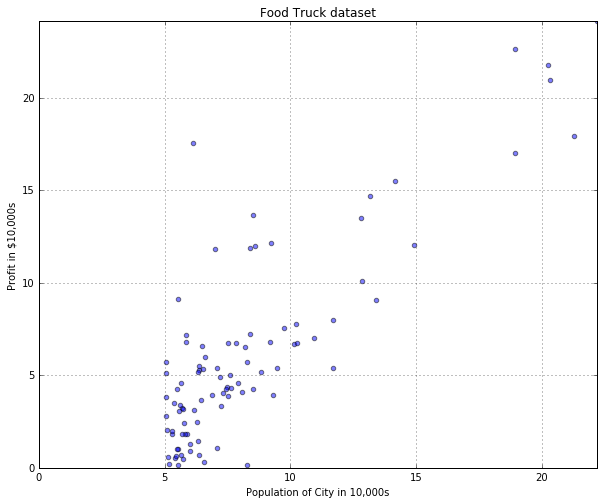

In [8]:
plt = scatterPlotHelper(X_df, y_df)
plt.xlim([0, X_df.max()[0]])
plt.ylim([0, y_df.max()[0]])
plt.show()

In [9]:
# Add intercept term to X_df
# this makes X_df compatibale for matrix multiplication with theta vector 
# for vectorized operations
# Appends the column intercept at the end of the dataframe
# so when we calcluate theta values, we need to take care
# that theta0 is at the end, which can be confusing at times
# X_df['intercept'] = 1

# correct way
X_df.insert(0, 'intercept', 1)

# converting dataframe objects to numpy arrays
X = np.array(X_df)
y = np.array(y_df).flatten()

In [10]:
# initializing theta with [0, 0]
theta = np.array([0, 0])

In [11]:
# testing cost function with initial theta values
computeCost(X, y, theta)

32.072733877455654

## Gradient descent parameters
* alpha (α): the learning rate or step-size
* iterations: required to converge gradient descent

### Selecting different learning rates for fixed number of iterations

for α = 0.3, theta [ nan  nan]
for α = 0.1, theta [ nan  nan]
for α = 0.03, theta [ -1.18529424e+82  -1.17985691e+83]
for α = 0.01, theta [-2.28286727  1.03099898]


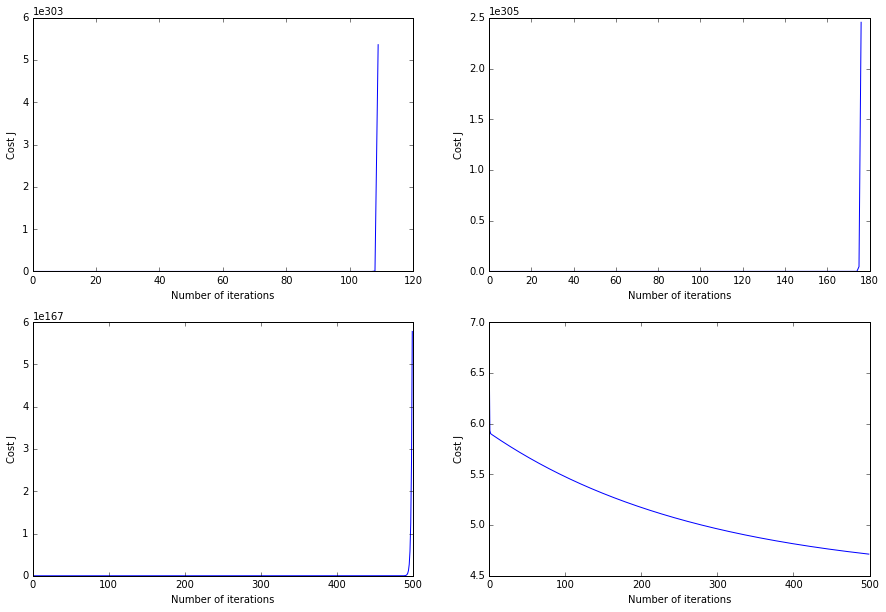

In [12]:
alphaList = [0.3, 0.1, 0.03, 0.01]
iterations = 500
J_history = [0]*len(alphaList)
plt.figure(figsize=(15, 10))

for idx, alpha in enumerate(alphaList):
    
    theta = np.array([0, 0])
    theta, J_history[idx] = gradientDescent(X, y, theta, alpha, iterations)
    ## theta (β0 and β1) values
    print("for α = {}, theta {}".format(alpha, theta))
    plt.subplot(2, 2, idx+1)
    plt.plot(J_history[idx])
    # plt.title('Convergence of gradient descent with an appropriate learning rate 0.01')
    plt.ylabel('Cost J')
    plt.xlabel('Number of iterations');

### Selecting different values for iterations for a fixed learning rate

for iterations = 50, theta [-0.26320379  0.82810187]
for iterations = 500, theta [-2.28286727  1.03099898]
for iterations = 1000, theta [-3.24140214  1.1272942 ]
for iterations = 1500, theta [-3.63029144  1.16636235]


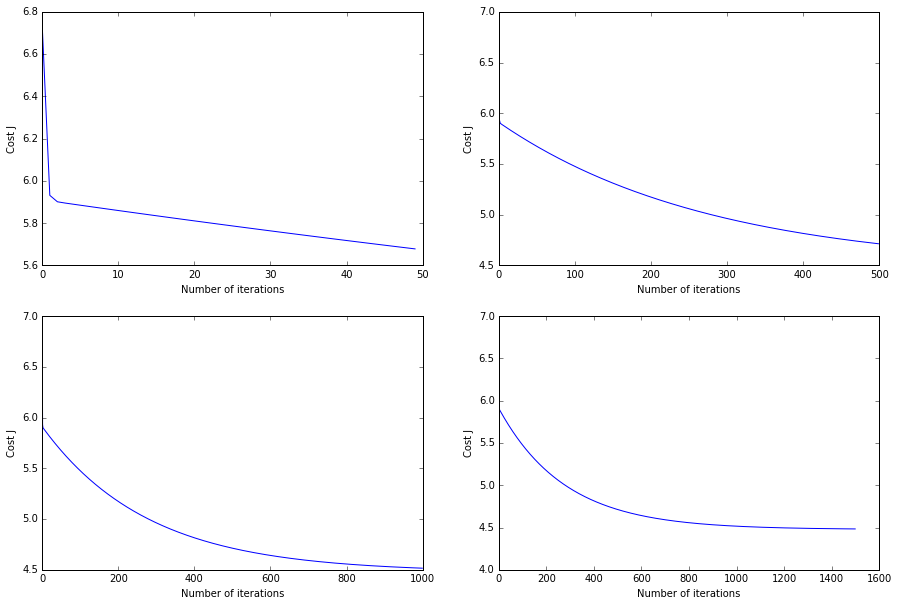

In [13]:
alpha = 0.01
iterList = [50, 500, 1000, 1500]
J_history = [0]*len(iterList)
plt.figure(figsize=(15, 10))

for idx, iters in enumerate(iterList):
    
    theta = np.array([0, 0])
    theta, J_history[idx] = gradientDescent(X, y, theta, alpha, iters)
    ## theta (β0 and β1) values
    print("for iterations = {}, theta {}".format(iters, theta))
    plt.subplot(2, 2, idx+1)
    plt.plot(J_history[idx])
    # plt.title('Convergence of gradient descent with an appropriate learning rate 0.01')
    plt.ylabel('Cost J')
    plt.xlabel('Number of iterations');

## What can be interpreted from the plots above?
From above plots it can be seen that gradient descent seems to converge well with learning rate of 0.01 for 1000 iterations. On incrementing the number of iterations to 1500 the cost seems to have become constant so we can assume that we have reached global minimum in around 1000 iterations.

# Contour plot and surface plot
* This plot shows the convergence of cost function w.r.t parameters $\theta_0$ and $\theta_1$ on a 2D Contour plot and 3D Surface plot. <br>
* For simple linear regression the cost function J($\theta$) is a bowl shaped function, it does not have a local minima. <br>
* The red dot in the center of the contour plot are the optimum value of parameters which minimizes the cost function.

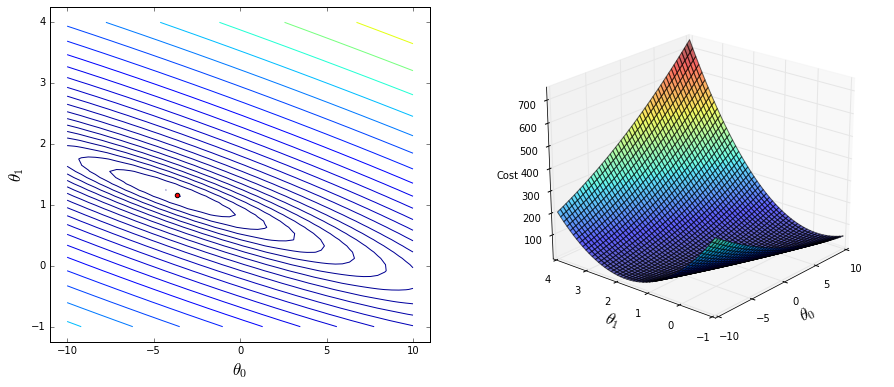

In [14]:
# Create grid coordinates for plotting 
b0 = np.linspace(-10, 10, 50) 
b1 = np.linspace(-1, 4, 50) 

xx, yy = np.meshgrid(b0, b1, indexing='xy') 
Z = np.zeros((b0.size, b1.size))

# Calculate Z-values (Cost) based on grid of coefficients 
for (i,j),v in np.ndenumerate(Z): 
    Z[i,j] = computeCost(X,y, theta=np.array([ xx[i,j], yy[i,j]] ) )

fig = plt.figure(figsize=(15,6)) 
ax1 = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2, projection='3d') 

# Left plot 
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 50), cmap=plt.cm.jet) 
ax1.scatter(theta[0],theta[1], c='r') 

# Right plot 
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet) 
ax2.set_zlabel('Cost') 
ax2.set_zlim(Z.min(),Z.max()) 
ax2.view_init(elev=25, azim=220) 

# settings common to both plots 
for ax in fig.axes: 
    ax.set_xlabel(r'$\theta_0$', fontsize=17) 
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

# Regression line
Regression line through the data shows us how well the model fits the data. <br>

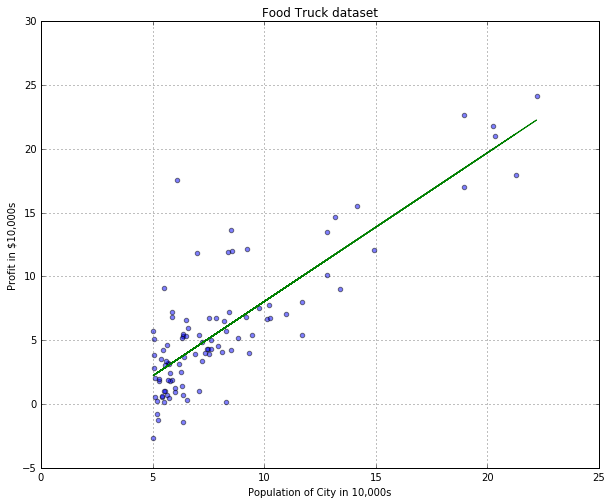

In [15]:
plt = scatterPlotHelper(df.population, df.profit);
y_pred = np.array(X).dot(theta);
plt.plot(df.population, y_pred, 'g');

# Prediction
Prediction for a population sizes of 35,000 and 100,000

In [16]:
# Predict values for population sizes of 35,000 and 70,000
th = 10000
X_test = np.array([[1, 3.5], [1, 10]])
rows = X_test.shape[1]
for it in range(rows):
    prediction = X_test[it].dot(theta)
    print("For population size of {}, predicted profit is ${:f}".format(int(X_test[it][1]*th), float(prediction*th)))

For population size of 35000, predicted profit is $4519.767868
For population size of 100000, predicted profit is $80333.320640
